# Get started with Computer Vision and TF

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/Rishit-dagli/Design-and-Code-2020/blob/master/cats-vs-dogs.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/Rishit-dagli/Design-and-Code-2020/blob/master/cats-vs-dogs.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://github.com/Rishit-dagli/Design-and-Code-2020/blob/master/cats-vs-dogs.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

In this notebook you will create your first Computer Vision based Deep Learning model to classify between cats and dogs with TensorFlow. We will use the [dogs-vs-cats dataset](https://www.kaggle.com/c/dogs-vs-cats/data) which is open-sourced. We will create a simple 2 class binary CNN to do so. You wil see all the aspects of training such a model, data preprocressing, the actual model, reducing overfitting and finally making inferences.

This guide uses [tf.keras](https://github.com/tensorflow/docs/blob/master/site/en/r1/guide/keras.ipynb), a high-level API to build and train models in TensorFlow.

> Note: I have marked section with `Only in Colab` and `Only in Local` to make this notebook useable by all

|Cats|Dogs|
|----|----|
|![](http://storage.rishit.tech/storage/Design-And-Code-2020/sample-cats.png)|![](http://storage.rishit.tech/storage/Design-And-Code-2020/sample-dogs.png)|

## Setup

### Download data (Only in Colab)

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /cats_and_dogs_filtered.zip

### Imports

In [ ]:
import os
import numpy as np
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

IMG_HEIGHT = IMG_WIDTH = 150

## Unzip files

In [ ]:
local_zip = '/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/')
zip_ref.close()

## Specifying directories

We will now specify our training and testing directories so things become easier for us at later stages.

In [ ]:
base_dir = '/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

## Data Augmentation

Data augmentation is a strategy that enables you to significantly increase the diversity of data available for training models, without actually collecting new data and to also reduce overfitting. Fortiunately its made super easy with `ImageDataGenerator`.

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

## Loading Images

Let's finally load the images and apply the data augmentation techniques we discussed above.

In [ ]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Model!!

Let's now finally build the model and train it.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 [==============================] - 17s 169ms/step - loss: 0.6922 - acc: 0.5330 - val_loss: 0.6870 - val_acc: 0.6070
Epoch 2/100
100/100 [==============================] - 17s 169ms/step - loss: 0.6811 - acc: 0.5625 - val_loss: 0.6672 - val_acc: 0.5950
Epoch 3/100
100/100 [==============================] - 17s 169ms/step - loss: 0.6671 - acc: 0.5950 - val_loss: 0.6649 - val_acc: 0.5990
Epoch 4/100
100/100 [==============================] - 17s 168ms/step - loss: 0.6522 - acc: 0.6300 - val_loss: 0.6489 - val_acc: 0.6500
Epoch 5/100
100/100 [==============================] - 17s 167ms/step - loss: 0.6364 - acc: 0.6435 - val_loss: 0.6310 - val_acc: 0.6300
Epoch 6/100
100/100 [==============================] - 17s 167ms/step - loss: 0.6272 - acc: 0.6510 - val_loss: 0.5998 - val_acc: 0.6740
Epoch 7/100
100/100 [==============================] - 17s 167ms/step - loss: 0.6082 - acc:

## Evaluating the model

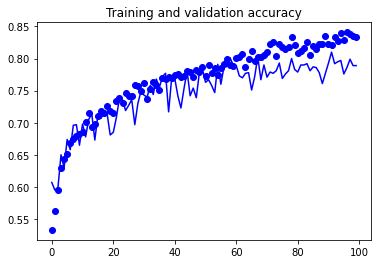

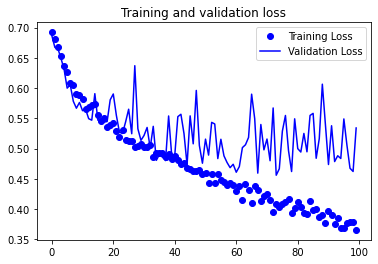

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Inferences

### Colab Only

In [ ]:
from google.colab import files
 
uploaded = files.upload()
 
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a cat")
  else:
    print(fn + " is a dog")

### Local Only

In [ ]:
img = image.load_img("images/testing_images/dog/dog-2.jpg", target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]<0.5:
    print("cat")
else:
    print("dog")